### Table of content
1. Problem statement
2. Importing data and necessary libraries
3. Statistical information
4. Exploratory Data Analysis

1. **Porblem statement**:
The problem at hand is to develop a machine learning-based fraud detection system for credit card transactions to mitigate the rising incidence of fraud cases associated with credit cards. As the most popular mode of payment for electronic commerce, credit card usage has surged, leading to an increase in fraudulent activities. The challenge is to accurately identify fraudulent transactions from an imbalanced dataset, using various algorithms such as logistic regression, Naive Bayes, random forest, and ensemble classifiers with boosting techniques. The project also involves conducting a comprehensive review of existing and proposed models for credit card fraud detection and performing a comparative analysis of these techniques.


2. **Importing data and necessary libraries**

The link to the datasets is provided in the link https://www.kaggle.com/datasets/ealaxi/paysim1

In [30]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import RandomOverSampler,SMOTE
splitter = StratifiedShuffleSplit(n_splits=10,random_state = 42,test_size=0.2)
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib
import os
%matplotlib inline

['<class', "'sklearn.neighbors._classification.KNeighborsClassifier'>"]

In [23]:
models

"<class 'sklearn.neighbors._classification.KNeighborsClassifier'>"

In [ ]:
# Set random seed for Python's random module
random.seed(42)
# Set random seed for NumPy
np.random.seed(42)

In [2]:
#Extract dataset to colab root folder
import zipfile
path_to_zip_file = "/content/drive/MyDrive/Predictiong_cvss_client/Fraud_Credit_Card/Data/Fraud.csv.zip"
directory_to_extract_to = "/content"
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#load Datasets
df = pd.read_csv("/content/Fraud.csv")
df.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

**Datasets description**
Data for the case is available in CSV format having 6362620 rows and 10 columns.

Content
Data for the case is available in CSV format having 6362620 rows and 10 columns.

Data Dictionary:

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df["isFlaggedFraud"].unique()

array([0, 1])

### 3. Statistical Information

In [ ]:
df.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
50%      1.327057e+05    2.146614e+05  0.000000e+00    0.000000e+00  
75%      9.430367e+05    1.111909e+06  0.000000e+00    0.000000e+00  
max      3.560159e+08    3.561793e+08  1.000000e+00    1.000000e+00

#### 4. Exploratory Data Analysis
** Missing values
** Categorical features
** Numerical features
** Target variable analysis
** Boxplots and histogram

**Missing Value**

In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Comment: No missing values

**Numerical features**

In [ ]:
#Print all numerical features
numFeatures = [f for f in df.columns if df[f].dtype != "O"]
numFeatures

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

In [ ]:
for f in numFeatures: # Print data types of numerical features
  print(f,":",df[f].dtype)

step : int64
amount : float64
oldbalanceOrg : float64
newbalanceOrig : float64
oldbalanceDest : float64
newbalanceDest : float64
isFraud : int64
isFlaggedFraud : int64


In [ ]:
#Continuos numerical features 
contFeat = [f for f in numFeatures if df[f].dtype == "float64"]
contFeat

['amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest']

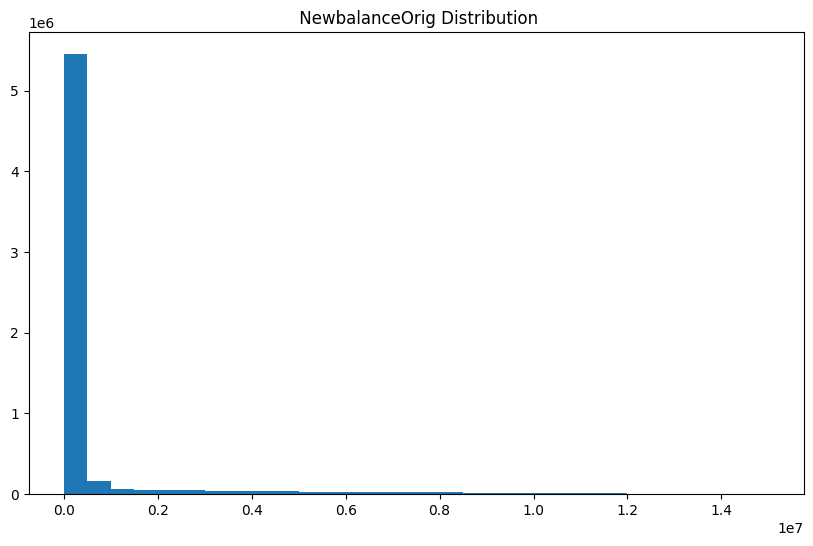

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df["newbalanceOrig"], 30, range=[0, 15000000],align='mid')#Plot distirbution newbalanceorig
plt.title(" NewbalanceOrig Distribution")
import os 
os.chdir("/content/drive/MyDrive/Predictiong_cvss_client/FraudlentTransact/images")
plt.savefig("fig1.png")
plt.show()

The fig above shows that most customers have a balance  ranging from 0 to half a miliion value after transactions.Reducing the xlimits can give us a better information about what is happening.

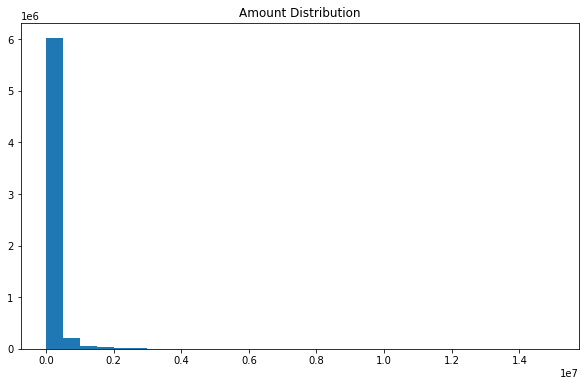

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df["amount"], 30, range=[0, 15000000],align='mid')
plt.title("Amount Distribution")
plt.savefig("fig2.png")
plt.show()

The fig above shows that most csutomers have a balance ranging from 0 to over 2 million in thier local currency.Just few customers have above this value

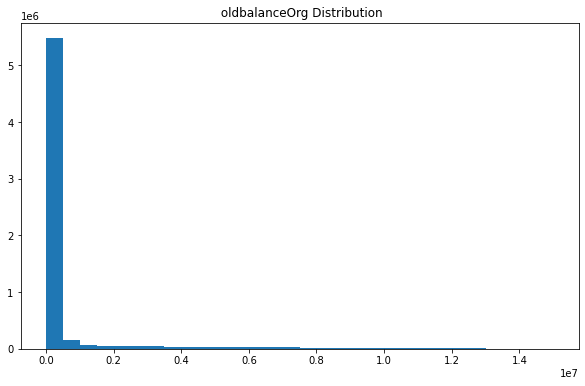

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df["oldbalanceOrg"], 30, range=[0, 15000000],align='mid')
plt.title(" oldbalanceOrg Distribution")
plt.savefig("fig3.png")
plt.show()

Fig 3 shows the same similar distribution occurs as that of new balance after transactions

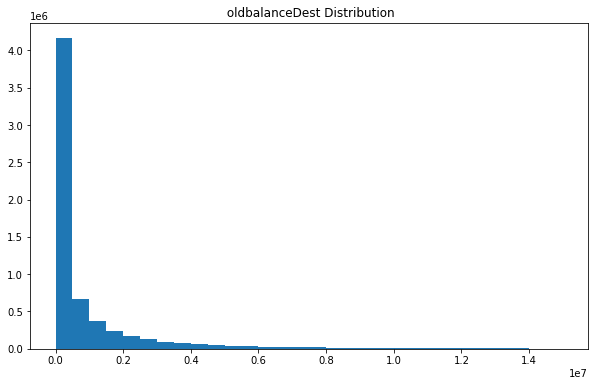

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df["oldbalanceDest"], 30, range=[0, 15000000],align='mid')
plt.title(" oldbalanceDest Distribution")
plt.savefig("fig4.png")
plt.show()

fig 4 shows that the distribution of the recipient balance after transaction is rights skewed whereby just most values ranges from o to over a value of 4 million 

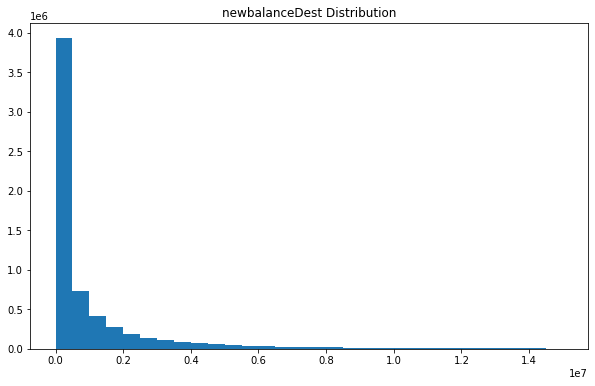

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df["newbalanceDest"], 30, range=[0, 15000000],align='mid')
plt.title("newbalanceDest Distribution")
plt.savefig("fig5 .png")
plt.show()

fig 5 which shows the distribution as of the recipient balance after transaction shows a similiar distributions as compared to that of the balance of recipient after transacions.

**Outliers**

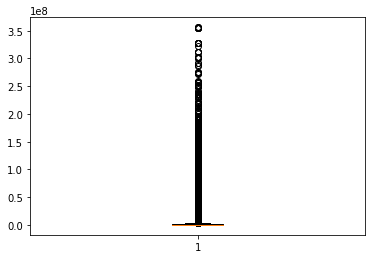

In [ ]:

plt.boxplot(df["newbalanceDest"])
plt.show()

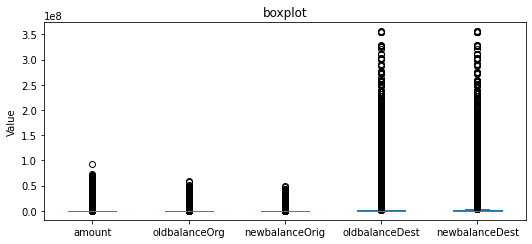

In [ ]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe

# Plot the dataframe
ax = df[contFeat].plot(kind='box', title='boxplot')
plt.ylabel("Value")

# Display the plot
plt.savefig("boxplots")
plt.show()

The figure above shows five different bxoplots which indicate a lot of outliers present in the features named

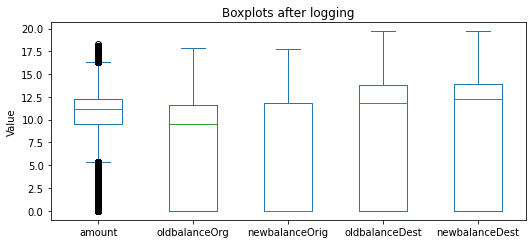

In [ ]:
data = df.copy()
for f in contFeat: # log features
  data[f] = np.log(data[f] + 1)

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe

# Plot the dataframe)
ax = data[contFeat].plot(kind='box', title='boxplot')
plt.ylabel("Value")

# Display the plot
plt.savefig("boxplots2afterlog")
plt.title("Boxplots after logging")
plt.show()

After logging down the features,the above figures eliminates the outiers to some but only the amount still have some outlliers

**Pairplots bewteen of continuous features**

**Making correlation plots**

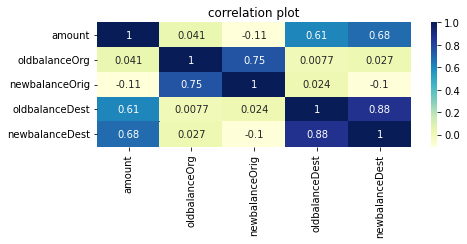

In [ ]:
dataplot = sns.heatmap(data[contFeat].corr(), cmap="YlGnBu", annot=True)
plt.title("correlation plot")
  
# displaying heatmap
plt.savefig("corrplot.png")
plt.show()

The above correlation shows that there is a positive relationship between the oldbalance of the customer before transaction and after transaction as expected and this is also the same for recipient.
The amonunt of owned by the customer in local currency is also positively related to the old balance of the recipeint before transaction and the new balance after transaction.




In [ ]:
contFeat

['amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest']

### Predicting Feature isFraud(This is the transactions made by the fraudulent agents inside the simulation. )

### Feature Engineering

**Feature Creation**

In [9]:
#Estimating amount transfered by customer
df["transferAmt"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
0  M1979787155             0.0             0.0        0               0   
1  M2044282225             0.0             0.0        0               0   
2   C553264065             0.0             0.0        1               0   
3    C38997010         21182.0             0.0        1               0   
4  M1230701703             0.0             0.0        0               0   

   transferAmt  
0      9839.64  
1      1864.28  
2       181.00  
3       181.00  
4     11668.14

In [10]:
#Dropping unnecessary columns like the name of the customer and recipeint
df = df.drop(["nameOrig","nameDest"],axis=1)
df.head()

step      type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   PAYMENT   9839.64       170136.0       160296.36             0.0   
1     1   PAYMENT   1864.28        21249.0        19384.72             0.0   
2     1  TRANSFER    181.00          181.0            0.00             0.0   
3     1  CASH_OUT    181.00          181.0            0.00         21182.0   
4     1   PAYMENT  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  transferAmt  
0             0.0        0               0      9839.64  
1             0.0        0               0      1864.28  
2             0.0        1               0       181.00  
3             0.0        1               0       181.00  
4             0.0        0               0     11668.14



**Handling class imbalance**

In [11]:
data = df.copy()

In [12]:
data.head()

step      type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   PAYMENT   9839.64       170136.0       160296.36             0.0   
1     1   PAYMENT   1864.28        21249.0        19384.72             0.0   
2     1  TRANSFER    181.00          181.0            0.00             0.0   
3     1  CASH_OUT    181.00          181.0            0.00         21182.0   
4     1   PAYMENT  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  transferAmt  
0             0.0        0               0      9839.64  
1             0.0        0               0      1864.28  
2             0.0        1               0       181.00  
3             0.0        1               0       181.00  
4             0.0        0               0     11668.14

In [13]:
data.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud',
       'transferAmt'],
      dtype='object')

In [14]:
#Selecting nearly equal samples of categories to handle class imbalance
dfIsFraud = data.loc[df["isFraud"] == 1]
dfnotfraud = data.loc[df["isFraud"] == 0]
dfnew = dfnotfraud.sample(8500)
newdata = pd.concat([dfIsFraud,dfnew],axis=0)
newdata = newdata.reset_index(drop=True)
newdata.head()

step      type   amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1  TRANSFER    181.0          181.0             0.0             0.0   
1     1  CASH_OUT    181.0          181.0             0.0         21182.0   
2     1  TRANSFER   2806.0         2806.0             0.0             0.0   
3     1  CASH_OUT   2806.0         2806.0             0.0         26202.0   
4     1  TRANSFER  20128.0        20128.0             0.0             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  transferAmt  
0             0.0        1               0        181.0  
1             0.0        1               0        181.0  
2             0.0        1               0       2806.0  
3             0.0        1               0       2806.0  
4             0.0        1               0      20128.0

Data preprocessing
- Splitting data into train and test
- Performing log transformation on numerical features
- Standard scaling of features
- One hot encoding on categorical features

In [52]:
import os
def transform_features(df):

   numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest','transferAmt']
   categorical_features = ["type"]

   X = df[['amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest','transferAmt','type']]
   Y = df[['isFraud']]
   for feature in numerical_features:
      df[feature] = np.log(df[feature] + 1)
   splitter = StratifiedShuffleSplit(n_splits=5,random_state = 42,test_size=0.2)
   for train,test in splitter.split(X,Y):
        x_train = X.loc[train]
        y_train = np.ravel(Y.loc[train].values)
        x_test = X.loc[test]
        y_test = np.ravel(Y.loc[test].values)

  

   numerical_pipeline = Pipeline(
                steps=[("imputer",SimpleImputer(strategy='median')),
                       ("scaler",MinMaxScaler())]
            )
   cat_pipeline = Pipeline(steps=[("imputer",SimpleImputer(strategy="most_frequent")),
                                            ("one_hot_encoder",OneHotEncoder())])
   
   preprocessing_obj = ColumnTransformer([("num_pippeline",numerical_pipeline,numerical_features),
                                              ("cat_pipeline",cat_pipeline,categorical_features)])
   
   input_features_train_arr = preprocessing_obj.fit_transform(x_train)
   input_features_test_arr = preprocessing_obj.fit_transform(x_test)

   #save preprocessing object

   path = "/content/drive/MyDrive/Predictiong_cvss_client/Fraud_Credit_Card/Artifacts"
   os.chdir(path)
   
   joblib.dump(preprocessing_obj, 'preprocessor.pkl')

   return (input_features_train_arr,
           y_train,
           input_features_test_arr,
           y_test,
           preprocessing_obj)

In [53]:
 x_train, y_train, x_test,y_test, preprocessing_obj = transform_features(df=newdata)

In [48]:
y_train

array([1, 0, 1, ..., 1, 1, 0])

In [18]:
#Create function to transform single data point

def transform_single_data_point(single_data,preprocessing_obj):
      # Create a DataFrame from the single data point
      single_data_df = pd.DataFrame([single_data_point], index=[0])

      # Transform the single data point using the ColumnTransformer
      transformed_data_point_arr = preprocessing_obj.transform(single_data_df)

      return transformed_data_point_arr


In [19]:
single_data_point = {"amount":3425,"oldbalanceOrg":2637,"newbalanceOrig":13242,"oldbalanceDest":12132,"newbalanceDest":1245,"transferAmt":123,"type":"PAYMENT"}
tranformed_single_data = transform_single_data_point(single_data = single_data_point,preprocessing_obj = preprocessing_obj)
print(tranformed_single_data)

[[-0.44271576 -0.37096874 -0.1959874  -0.34073718 -0.44051823 -0.38377669
   0.          0.          0.          1.          0.        ]]


### Model building
- Cross validation
- Training and evalutaion with best model
- Saving trained models

Cross validation

In [54]:
#Define function to cross validate single model
def run_cross_validation(model, X, y, cv=5):
    accuracy = cross_val_score(model, X, y, scoring='accuracy', cv=cv)
    f1 = cross_val_score(model, X, y, scoring='f1_macro', cv=cv)
    auc_roc = cross_val_score(model, X, y, scoring='roc_auc', cv=cv)
    
    return accuracy, f1, auc_roc

In [55]:
def run_cross_validation_models(model_list, X, y, cv=5):
    results = []
    
    for model_name,model in model_list.items():
        accuracy, f1, auc_roc = run_cross_validation(model, X, y, cv)
        
        result = {
            'Model': model_name,
            'Accuracy': accuracy.mean(),
            'F1 Score': f1.mean(),
            'AUC-ROC Score': auc_roc.mean()
        }
        
        results.append(result)
    
    return pd.DataFrame(results)

In [56]:
models = {"logistic_reg":LogisticRegression(random_state=42),"Naive_Bayes":MultinomialNB(),
          "K-Nearest-Neighbour":KNeighborsClassifier(),"xgboost":xgb.XGBClassifier(random_state=42),
                                                                                   "Random_Forest":RandomForestClassifier(
                                                                                      random_state=42
                                                                                   )

                                                                                   }
results_df = run_cross_validation_models(model_list=models,
                                         X=x_train,
                                         y=y_train,
                                         cv=5)


In [71]:
path = "/content/drive/MyDrive/Predictiong_cvss_client/Fraud_Credit_Card/Results"
os.chdir(path)
results_df.to_csv("Crossval_score_df.csv",index=False)

In [57]:
results_df

Model  Accuracy  F1 Score  AUC-ROC Score
0         logistic_reg  0.920793  0.920559       0.982434
1          Naive_Bayes  0.867464  0.866323       0.934478
2  K-Nearest-Neighbour  0.986836  0.986835       0.994222
3              xgboost  0.993269  0.993267       0.998833
4        Random_Forest  0.992595  0.992594       0.998731

Comment:The best model so far is xgboost

### Training and evaluation with different models

Training and evaluation with Logistic Regression

In [58]:
def train_model(model):
    model.fit(x_train,y_train)
    preds = model.predict(x_test)
    return model,preds,y_test

In [78]:
lreg = LogisticRegression()
model,predictions,true_values = train_model(model=lreg)

In [79]:
from sklearn import metrics
from sklearn.metrics import classification_report
cp = classification_report(true_values,predictions)
print("Classification report of logreg")
print(cp)  

Classification report of logreg
              precision    recall  f1-score   support

           0       0.99      0.85      0.91      1700
           1       0.86      0.99      0.92      1643

    accuracy                           0.92      3343
   macro avg       0.93      0.92      0.92      3343
weighted avg       0.93      0.92      0.92      3343



Confusion matrix of logisttic regression


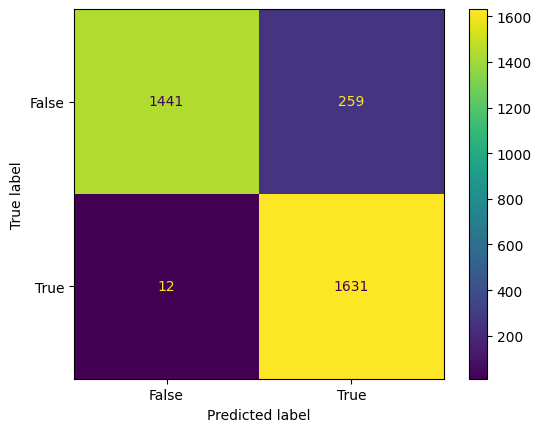

In [80]:
confusion_matrix = metrics.confusion_matrix(true_values, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
print("Confusion matrix of logisttic regression")
cm_display.plot()
plt.savefig("confusion_matrix_log_reg.png")
plt.show()

**Training and evaluation with  XGBOOST**

In [83]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
model,predictions,true_values = train_model(model=xgb)
from sklearn.metrics import classification_report
cp = classification_report(true_values,predictions)
print("Classification report of XGBoost")
print(cp) 

Classification report of XGBoost
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1700
           1       1.00      0.76      0.86      1643

    accuracy                           0.88      3343
   macro avg       0.90      0.88      0.88      3343
weighted avg       0.90      0.88      0.88      3343



Confusion matrix of XGBOOST


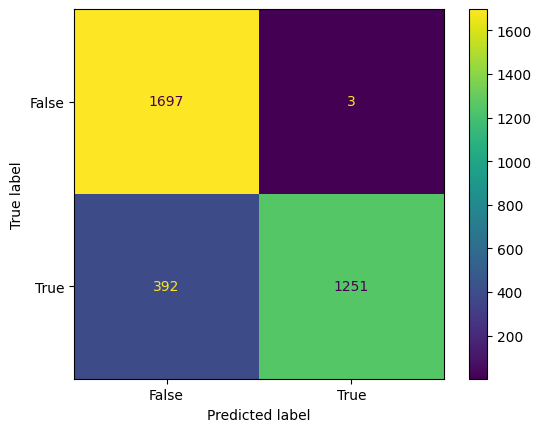

In [84]:
confusion_matrix = metrics.confusion_matrix(true_values, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
print("Confusion matrix of XGBOOST")
cm_display.plot()
plt.savefig("confusion_matrix_xgb.png")
plt.show()

**Training and evaluation with  Guassian NaiveBayes**

In [85]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model,predictions,true_values = train_model(model)
from sklearn.metrics import classification_report
cp = classification_report(true_values,predictions)
print("Classification report of Guassain NaiveBayes")
print(cp) 

Classification report of Guassain NaiveBayes
              precision    recall  f1-score   support

           0       1.00      0.76      0.86      1700
           1       0.80      1.00      0.89      1643

    accuracy                           0.87      3343
   macro avg       0.90      0.88      0.87      3343
weighted avg       0.90      0.87      0.87      3343



Confusion matrix of Guassain NaiveBayes


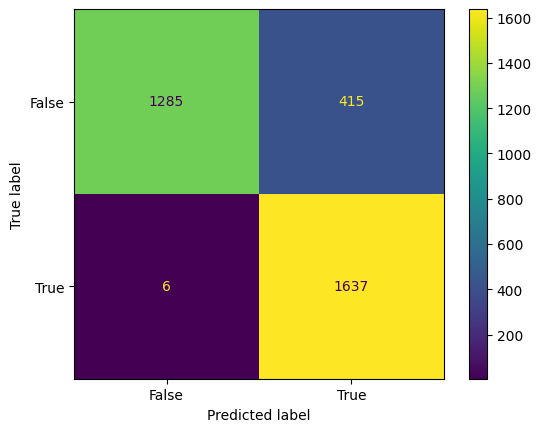

In [86]:
confusion_matrix = metrics.confusion_matrix(true_values, predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
print("Confusion matrix of Guassain NaiveBayes")
cm_display.plot()
plt.savefig("confusion_matrix_naive_bayes.png")
plt.show()


Training the data with best model (XGBOOST)

In [88]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state=42)
path = "/content/drive/MyDrive/Predictiong_cvss_client/Fraud_Credit_Card/Artifacts"
os.chdir(path)
model.fit(x_train,y_train)# Save the model
model.save_model('xgboost_model.model')
"""
# Load the model
loaded_model = xgb.XGBClassifier()
loaded_model.load_model('xgboost_model.model')"""


"\n# Load the model\nloaded_model = xgb.XGBClassifier()\nloaded_model.load_model('xgboost_model.model')"

### Clustering Customers local balance and the amount transferd by the customers 
This aims to extract important information by grouping customers based on their balance and the amount transferred by the customers which will allow us to gain more insight on the transactions that are fraudlent

In [ ]:
newdata.head()

step  type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1     4  5.204007       5.204007             0.0        0.000000   
1     1     1  5.204007       5.204007             0.0        9.960954   
2     1     4  7.939872       7.939872             0.0        0.000000   
3     1     1  7.939872       7.939872             0.0       10.173629   
4     1     4  9.909917       9.909917             0.0        0.000000   

   newbalanceDest  isFraud  isFlaggedFraud  transferAmt  
0             0.0        1               0     5.204007  
1             0.0        1               0     5.204007  
2             0.0        1               0     7.939872  
3             0.0        1               0     7.939872  
4             0.0        1               0     9.909917

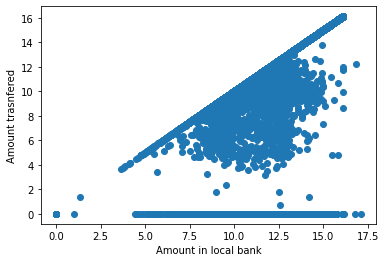

In [ ]:
plt.scatter(newdata["amount"],newdata["transferAmt"])
plt.xlabel("Amount in local bank")
plt.ylabel("Amount trasnfered")
plt.show()

In [ ]:
#Create kmeans object
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [ ]:
#Scale required features

In [ ]:
newdata.isnull().sum()

step                 0
type                 0
amount               0
oldbalanceOrg        0
newbalanceOrig       0
oldbalanceDest       0
newbalanceDest       0
isFraud              0
isFlaggedFraud       0
transferAmt       1843
dtype: int64

In [ ]:
newdata["transferAmt"] = newdata["transferAmt"].fillna(newdata["transferAmt"].mean())

In [ ]:
scaler = MinMaxScaler()
for feature in ["amount","transferAmt"]:
  newdata[feature] = scaler.fit_transform(newdata[[feature]])

In [ ]:
preds = km.fit_predict(newdata[["amount","transferAmt"]])
preds

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [ ]:
newdata["Cluster"] = preds

In [ ]:
newdata.head()

step  type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1     4  0.304322       5.204007             0.0        0.000000   
1     1     1  0.304322       5.204007             0.0        9.960954   
2     1     4  0.464312       7.939872             0.0        0.000000   
3     1     1  0.464312       7.939872             0.0       10.173629   
4     1     4  0.579517       9.909917             0.0        0.000000   

   newbalanceDest  isFraud  isFlaggedFraud  transferAmt  Cluster  
0             0.0        1               0     0.322867        0  
1             0.0        1               0     0.322867        0  
2             0.0        1               0     0.492606        0  
3             0.0        1               0     0.492606        0  
4             0.0        1               0     0.614832        0

In [ ]:
newdata["Cluster"].unique()

array([0, 1, 2], dtype=int32)

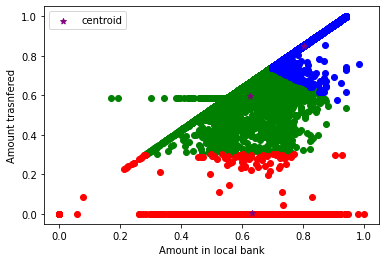

In [ ]:
df1 = newdata[newdata.Cluster==0]
df2 = newdata[newdata.Cluster==1]
df3 = newdata[newdata.Cluster==2]
plt.scatter(df1["amount"],df1["transferAmt"],color="green")
plt.scatter(df2["amount"],df2["transferAmt"],color="red")
plt.scatter(df3["amount"],df3["transferAmt"],color="blue")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker='*',label='centroid')
plt.legend()


plt.xlabel("Amount in local bank")
plt.ylabel("Amount trasnfered")
plt.show()

In [ ]:
#Implementing elbow method
kRange = range(1,7)
sse = []

for k in kRange:
  km = KMeans(n_clusters=k)
  km.fit(newdata[["amount","transferAmt"]])
  sse.append(km.inertia_)

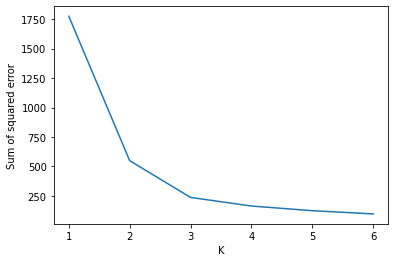

In [ ]:
#plot result
plt.xlabel("K")
plt.ylabel("Sum of squared error")
plt.plot(kRange,sse)
plt.show()

Comment 3 as the number of clusters is good choice